In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


2021-08-30 18:10:36.837788: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-30 18:10:36.849567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-30 18:10:36.851758: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
train_path ='./chest_xray/train'
test_path = './chest_xray/test'
valid_path = './chest_xray/val'

In [4]:
import os

os.listdir(train_path)

['NORMAL', 'PNEUMONIA']

In [5]:
train_batches = (ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
                 .flow_from_directory(directory=train_path, target_size=(224,224), classes=['NORMAL','PNEUMONIA'], batch_size=10)
                )
valid_batches = (ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
                 .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['NORMAL','PNEUMONIA'], batch_size=10))
test_batches = (ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
                .flow_from_directory(directory=test_path, target_size=(224,224), classes=['NORMAL','PNEUMONIA'], batch_size=10, shuffle=False))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
imgs, labels = next(train_batches)

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

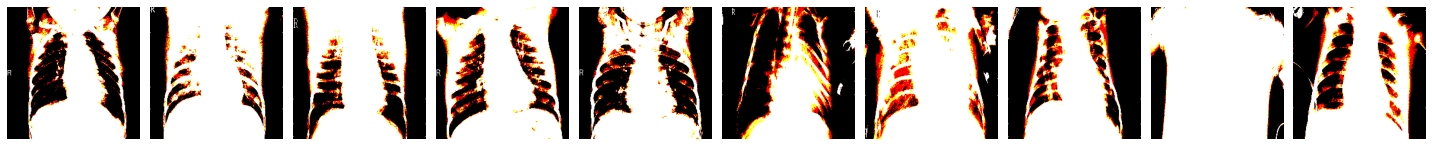

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [8]:
plotImages(imgs)
print(labels)

In [9]:
model = Sequential([
    Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape = (224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='sigmoid'),
])

2021-08-30 18:10:38.311713: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-30 18:10:38.316863: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-30 18:10:38.317437: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-30 18:10:38.317956: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=train_batches,validation_data=valid_batches,epochs =10, steps_per_epoch=10)

2021-08-30 18:10:39.321446: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-08-30 18:10:40.538569: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8202


10/10 [==============================] - 4s 127ms/step - loss: 14.0115 - accuracy: 0.7200 - val_loss: 3.3913 - val_accuracy: 0.6250
Epoch 2/10
10/10 [==============================] - 1s 104ms/step - loss: 4.6516 - accuracy: 0.7700 - val_loss: 2.9845 - val_accuracy: 0.6875
Epoch 3/10
10/10 [==============================] - 1s 113ms/step - loss: 3.3404 - accuracy: 0.7900 - val_loss: 8.2449 - val_accuracy: 0.6250
Epoch 4/10
10/10 [==============================] - 1s 107ms/step - loss: 1.8740 - accuracy: 0.8700 - val_loss: 16.2160 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 1s 115ms/step - loss: 2.4272 - accuracy: 0.8700 - val_loss: 2.9211 - val_accuracy: 0.7500
Epoch 6/10
10/10 [==============================] - 1s 119ms/step - loss: 3.7270 - accuracy: 0.7900 - val_loss: 8.6855 - val_accuracy: 0.5625
Epoch 7/10
10/10 [==============================] - 1s 115ms/step - loss: 1.5125 - accuracy: 0.9400 - val_loss: 3.2954 - val_accuracy: 0.8125
Epoch 8/10
10/1

In [13]:
predictions = model.predict(test_batches, steps=1, verbose=1)
pred_classes_x = np.argmax(predictions, axis=1)
print(pred_classes_x)

1/1 [==============================] - 0s 209ms/step
[1 1 1 1 1 0 0 1 1 1]


In [14]:
model.save('ml_model.h5')